### Análise preditiva: COVID - 19 no Brasil

#### Serão analisados os casos de contaminação do vírus COVID - 19 no território brasileiro.

In [3]:
# importando bibliotecas

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Armazendando nossos dados no dataframe "df"

df = pd.read_csv(r'C:\Users\Gustavo\Desktop\DIO\Covid no Brasil - ML Python\machine-learning-covid19-python-forecast\covid_19_data.csv',parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


É importante saber quais os tipos dos dados, pra evitar futuros problemas de formatação

In [5]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [6]:
# vou retirar as letras maiúsculas e caracteres especiais dos nomes das colunas, usando uma função que irei criar abaixo

import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]","", col_name ).lower()

In [7]:
# aplicando a função
df.columns = [corrige_colunas(col) for col in df.columns]

In [8]:
df
# ok, tudo certo

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


### Início das análises

O nosso banco de dados, como pode ser percebido, contém dados de países do mundo inteiro, e o estudo atual é apenas sobre casos no Brasil. Para isso, vamos definir um novo data-frame para trabalho. 

In [9]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


Podemos perceber que os dados a nível de Estado estão ausentes, sendo possível realizar a análise apenas em nível nacional, sem divisões por região.

In [10]:
# vou reservar um data-frame com o nome "brasil", para o estud

brasil = df.loc[(df.countryregion == 'Brazil') 
& (df.confirmed > 0)]

In [11]:
# utilizei o método line, do plotly, passando os parâmetros de data e confirmação

px.line (brasil, 'observationdate', 'confirmed',
    labels={'observationdate':'Data','confirmed':'Número de casos confirmados'},
    title='Casos confirmados no Brasil', markers = True)


Estudo de novos casos por dia

In [12]:
# estarei utilizando um função, que faz a contagem dos novos casos subtraindo sempre os casos do dia anterior. 
# Para isso, utilizarei o método "lambda" e o "arange" do numpy para selecionar apenas as linhas.

brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0]) #selecionando as linhas
))

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16928\3699221226.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# vamos vizualizar os novos casos em um gráfico

px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia',
    labels={'observationdate': 'Data', 'novoscasos': 'Novos casos'})

Analisando o número de mortes

In [14]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes', mode='lines+markers',
               line=dict(color='red'))
)

# editando o layout

fig.update_layout(title='Mortes por COVID-19 no Brasil',
                    xaxis_title='Data',
                    yaxis_title='Número de mortes')
fig.show()


Analisando a taxa de crescimento

In [15]:
# análise desde o primeiro caso

def taxa_cresc (data, variable, data_inicio=None, data_fim=None):
    # estamos dizendo que se a data_inicio estiver vazia, esta será definida como a primeira data no banco de dados

    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)

    # precisamos definir valores de passado e presente

    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    # definindo que analisaremos os dados em dias

    n= (data_fim - data_inicio).days
    
    # calculando taxa

    taxa = (presente/passado)**(1/n) - 1

    return taxa * 100

In [16]:
# utilizando nossa função que acaba de ser criada

cresc_avg = taxa_cresc(brasil,'confirmed')
print (f'O crescimento médio dos casos, para o período avaliado é de: {cresc_avg.round(2)}%.')

O crescimento médio dos casos, para o período avaliado é de: 16.27%.


In [17]:
# definindo função para descobrir a taxa de crescimento diária

def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [18]:
# aplicando a função
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

Nosso array não possibilita uma visualização clara desse crescimento, por isso iremos plotar

In [19]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento diária',
        labels={'y':'Taxa de crescimento', 'x': 'Data'})

### Predições

Construindo um modelo preditivo de série temporais

In [20]:
# imports necessários

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [21]:
# criando o objeto "novoscasos"

novoscasos = brasil.novoscasos
novoscasos.index = brasil.observationdate

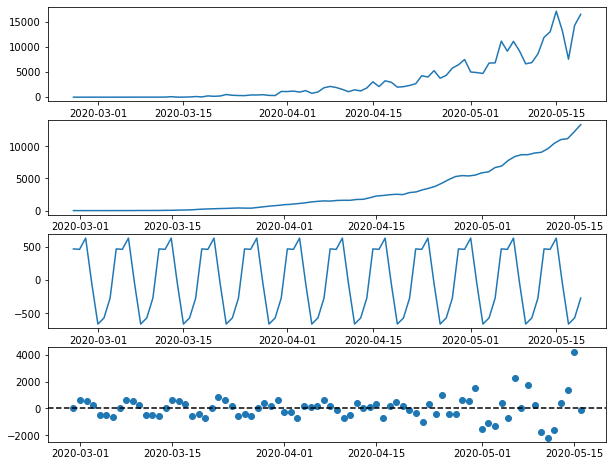

In [22]:
# decompondo os novos casos

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

Decompondo os casos confirmados

In [23]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate

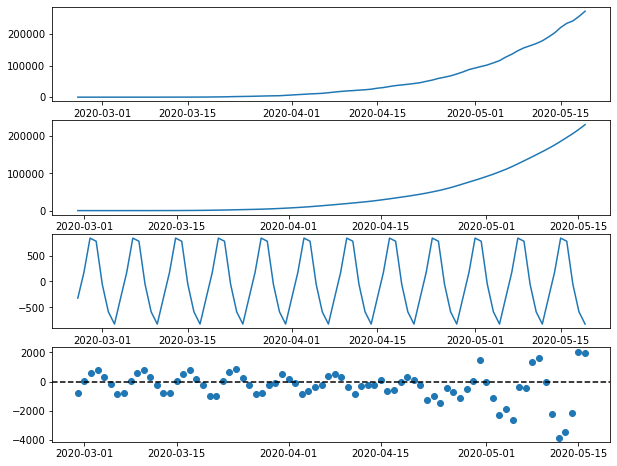

In [24]:
res2 = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmados.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

### Utilizando a biblioteca Arima para predição de casos

In [25]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [26]:
# o autoarima nos fornece um modelo automático para as predições

from pmdarima.arima import auto_arima

In [27]:
# reaproveitando o objeto "confirmados"

modelo = auto_arima(confirmados)

In [28]:
# neste plot, é interessante que a linha azul (casos observados para treino) esteja alinhada com a vermelha (machine learning)
# isso vai garantir que a máquina entendeu o que queremos, e vai tentar prever os próximos 30 dias com a maior precisão possível
# quanto mais tempo, mais difícil fica a previsão

fig = go.Figure(go.Scatter(
        x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y=modelo.predict_in_sample().round(3), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(30), name='Forecast'))

fig.update_layout(title='Previsão de casos confimados para os próximos 30 dias',
                    yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

#### Ao compararmos a notícia abaixo, com a data no nosso modelo de predição, vemos que os números se aproximam muito. O que valida nosso estudo e torna o modelo confiável.

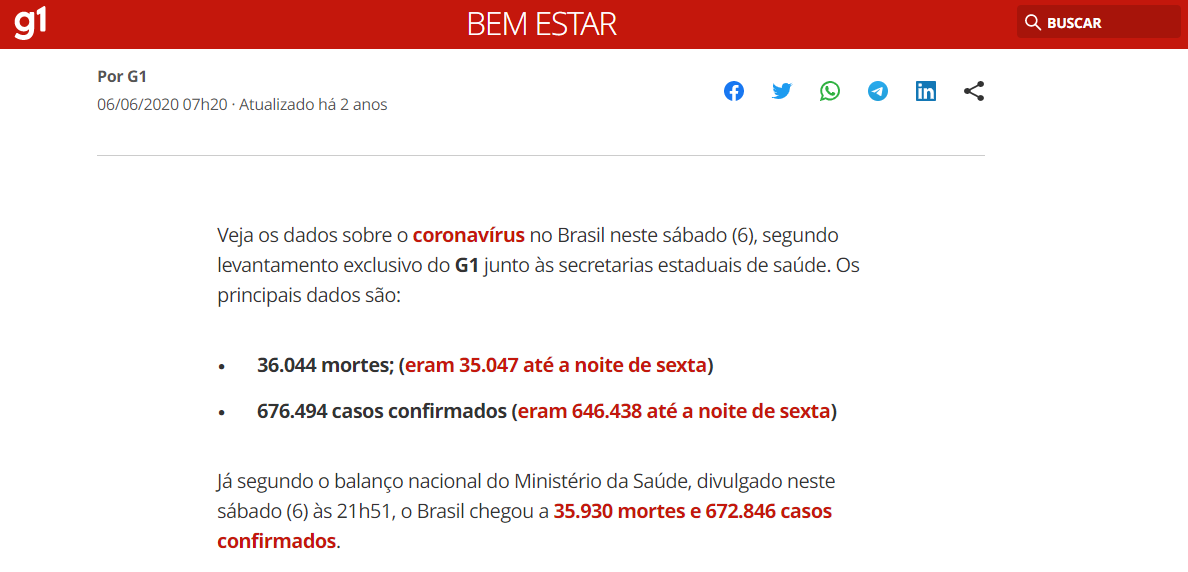

###### fonte: https://g1.globo.com/bemestar/coronavirus/noticia/2020/06/06/casos-de-coronavirus-e-numero-de-mortes-no-brasil-em-6-de-junho.ghtml

### Documentação utilizada
Pandas: https://pandas.pydata.org/docs/

Numpy: https://numpy.org/doc/

Arima: http://alkaline-ml.com/pmdarima/

StatsModels: https://www.statsmodels.org/stable/index.html

MatplotLib: https://matplotlib.org/stable/index.html

Plotly: https://plotly.com/python/line-charts/